In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#input_file = "output_20191008_0336AM.csv" #complete
#input_file = "output_20191116_1256PM.csv" #partial
input_file = "output_20200219_2125PM.csv" #866 files
df = pd.read_csv(input_file, header = 0)

In [6]:
df['FLOW'] = df['SRCNODE']+'-'+df['DESTNODE']
df['FM']=df['FAILURE']+df['MISSING']

In [7]:
df_failure = df[ (df.FM==1)]

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import sklearn
import graphviz 
from sklearn.calibration import CalibratedClassifierCV

In [9]:
df_dummy = pd.get_dummies(df_failure[['SRCNODE', 'DESTNODE','FM','RETRIES','LABEL']], prefix=['SRC', 'DEST'], columns=['SRCNODE', 'DESTNODE'])

In [10]:
y=df_failure['LABEL']
x=df_dummy.drop(['LABEL'],axis=1)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import multilabel_confusion_matrix,balanced_accuracy_score,f1_score

In [12]:
%%time
clf = DecisionTreeClassifier(max_depth = 20)
clf_model=clf.fit(x,y)

CPU times: user 76.5 ms, sys: 5.42 ms, total: 81.9 ms
Wall time: 80.6 ms


In [13]:
cal_svc=CalibratedClassifierCV(base_estimator=clf,cv="prefit")
cal_clf=cal_svc.fit(x,y)

In [14]:
def accuracy(model, test_data, classes, k):
    if(k==0): return null,null
    num = classes.size
    correct=0
    for label in classes:
        label_pred=[]
        isCorrect=False
        test_data_1=test_data[test_data.LABEL==label]
        x_test_1=test_data_1.drop(['LABEL'],axis=1)
        test_prob_1 = model.predict_proba(x_test_1)
        label_array=test_prob_1.mean(axis=0)
        #label_array=np.nanmean(np.where(test_rf_prob_1!=0,test_rf_prob_1,np.nan),0)
        label_index = label_array.argmax()
        label_index_sort = label_array.argsort()
        #label_pred[0] = classes[label_index]
        for j in range(0,k): 
            if(j==0):
                label_pred.append(classes[label_index])
            else:
                label_pred.append(classes[label_index_sort[(-1)*j-1]])
            #print(j,label_pred[j],label)
            if(label==label_pred[j]):
                isCorrect=True
                break
               
        #print(label_pred)
        #print(isCorrect)
        if isCorrect:
            correct=correct+1
    return correct, correct/num

In [11]:
pred=clf.predict(x)
balanced_accuracy_score(y, pred)

0.22066200214295698

In [32]:
c,r=accuracy(clf_model, df_dummy, clf.classes_,1)
c,r

(40, 0.6060606060606061)

In [33]:
c,r=accuracy(clf_model, df_dummy, clf.classes_,2)
c,r

(52, 0.7878787878787878)

In [34]:
c,r=accuracy(clf_model, df_dummy, clf.classes_,3)
c,r

(53, 0.803030303030303)

In [18]:
c,r=accuracy(clf, df_dummy, clf.classes_,25)
c,r

(55, 0.8333333333333334)

'simple.pdf'

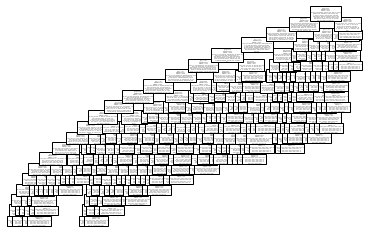

In [16]:
tree.plot_tree(clf.fit(x,y))
dot_data = tree.export_graphviz(clf_model, out_file=None,
                         feature_names=x.columns, 
                         class_names=clf.classes_,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("simple")

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import multilabel_confusion_matrix,balanced_accuracy_score,f1_score

In [18]:
clf_model.classes_

array(['CENIC_Link0', 'CENIC_Link1', 'CENIC_Link5', 'CENIC_Link9',
       'CacheCENICRouter_Link18', 'CacheCENICRouter_Link19',
       'CacheCENICRouter_Link4', 'CacheCal', 'CacheCal_Link19',
       'CacheFNAL', 'CacheFNAL_Link26', 'CacheNY', 'CacheNYRouter_Link27',
       'CacheNYRouter_Link28', 'CacheNY_Link28', 'CacheSDSC',
       'CacheSDSC_Link18', 'CacheStarLightRouter_Link24',
       'CacheStarLightRouter_Link25', 'CacheStarLightRouter_Link26',
       'CacheUC', 'CacheUC_Link25', 'CacheUNL', 'CacheUNLRouter_Link20',
       'CacheUNLRouter_Link3', 'CacheUNL_Link20', 'ESNET_Link1',
       'ESNET_Link2', 'ESNET_Link22', 'ESNET_Link4', 'ESNET_Link7',
       'I2_Link0', 'I2_Link13', 'I2_Link14', 'I2_Link2', 'I2_Link27',
       'I2_Link3', 'I2_Link6', 'OriginCal', 'OriginCalRouter_Link22',
       'OriginCalRouter_Link23', 'OriginCal_Link23', 'OriginFNAL',
       'OriginFNAL_Link21', 'OriginNCSA', 'OriginNCSARouter_Link13',
       'OriginNCSARouter_Link15', 'OriginNCSA_Link15', 'Origin

In [19]:
print(x[:1])

   FM  RETRIES  SRC_CacheCal  SRC_CacheFNAL  SRC_CacheNY  SRC_CacheSDSC  \
8   1        0             0              0            0              0   

   SRC_CacheUC  SRC_CacheUNL  SRC_OriginCal  SRC_OriginFNAL  ...  \
8            1             0              0               0  ...   

   DEST_CacheNY  DEST_CacheSDSC  DEST_CacheUC  DEST_CacheUNL  DEST_OriginCal  \
8             0               0             0              0               0   

   DEST_OriginFNAL  DEST_OriginNCSA  DEST_OriginSDSC  DEST_OriginUC  \
8                0                0                1              0   

   DEST_OriginUNL  
8               0  

[1 rows x 26 columns]


In [20]:
df_failure.head

<bound method NDFrame.head of                FILENAME                        PATH    SRCNODE    DESTNODE  \
8        a12as_0107.pdb  20190425T121649-0700/00/00    CacheUC  OriginSDSC   
7144     a12as_0107.pdb  20190425T121649-0700/00/00    CacheUC    OriginUC   
27660    a12as_0107.pdb  20190425T121649-0700/00/00    CacheUC     CacheNY   
40148    a12as_0107.pdb  20190425T121649-0700/00/00    CacheUC  OriginNCSA   
64232    a12as_0107.pdb  20190425T121649-0700/00/00    CacheUC   OriginCal   
...                 ...                         ...        ...         ...   
7999451  a12as_0035.pdb  20190425T121649-0700/01/00  OriginCal  OriginFNAL   
7999452  design.resfile  20190425T121649-0700/01/00  OriginCal  OriginFNAL   
7999453  a12as_0032.pdb  20190425T121649-0700/01/00  OriginCal  OriginFNAL   
7999454  repack.resfile  20190425T121649-0700/01/00  OriginCal  OriginFNAL   
7999455  a12as_0006.pdb  20190425T121649-0700/01/00  OriginCal  OriginFNAL   

                  TIME_START     

In [21]:
test_prob = clf_model.predict_proba(x[:1])
test_prob

array([[0.        , 0.        , 0.00829876, 0.16182573, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00414938, 0.13692946, 0.        ,
        0.00414938, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00829876,
        0.16182573, 0.37759336, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12448133, 0.        , 0.        ,
        0.01244813]])

In [22]:
cross_val_score(clf, x, y, scoring='accuracy',cv=5)

array([0.08541252, 0.21102749, 0.25357747, 0.29187856, 0.20271731])

In [23]:
clf_model.score(x,y)

0.3774339413700821

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [25]:
y_pred = clf.fit(x_train, y_train).predict(x_test)

In [26]:
y_test.shape,y_pred.shape

((8128,), (8128,))

In [27]:
balanced_accuracy_score(y_test, y_pred)

0.2039690663592467

In [28]:
f1_score(y_test, y_pred,average='weighted')

/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.30497340444731347

In [29]:
test_prob = clf_model.predict_proba(x_train[:1])

In [30]:
test_prob

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.18285714, 0.        ,
        0.02285714, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01142857,
        0.19428571, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19428571, 0.01142857, 0.        ,
        0.        , 0.19428571, 0.        , 0.        , 0.        ,
        0.        , 0.01142857, 0.        , 0.        , 0.17714286,
        0.        ]])

In [31]:
clf_model.classes_[26]

'ESNET_Link1'

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, random_state=0)

In [21]:
clf_rf_model=clf_rf.fit(x, y)

In [37]:
c,r=accuracy(clf_rf_model, df_dummy, clf.classes_,3)
c,r

(54, 0.8181818181818182)

In [35]:
clf_rf_model.score(x,y)

0.37780306991909934

In [26]:
clf_extra = ExtraTreesClassifier(n_estimators=10, max_depth=20, min_samples_split=2, random_state=0)

In [27]:
cross_val_score(clf_extra, x, y, cv=5)

array([0.08541252, 0.21886039, 0.2580397 , 0.29187856, 0.2028717 ])

In [28]:
clf_extra_model=clf_extra.fit(x, y)

In [38]:
c,r=accuracy(clf_extra_model, df_dummy, clf.classes_,3)
c,r

(53, 0.803030303030303)

In [39]:
clf_extra_model.score(x,y)

0.37749546279491836

In [40]:
y_pred_extra = clf_extra.fit(x_train, y_train).predict(x_test)
balanced_accuracy_score(y_test, y_pred_extra)

0.20484249755739944

In [41]:
y_pred = clf_model.predict(x)
balanced_accuracy_score(y, y_pred)

0.22003122895056715

In [40]:
y_pred_rf = clf_rf_model.predict(x)
balanced_accuracy_score(y, y_pred_rf)

0.22599816112825222

In [43]:
y_pred_extra = clf_extra_model.predict(x)
balanced_accuracy_score(y, y_pred_extra)

0.21926639011668567

In [41]:
f1_score(y, y_pred_rf,average='weighted')

/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.32663343311587506

In [45]:
df_dummy_1=df_dummy[df_dummy.LABEL=='I2_Link0']

In [46]:
x_test_1=df_dummy_1.drop(['LABEL'],axis=1)
test_prob_1 = clf_model.predict_proba(x_test_1)
test_prob_1.shape, x_test_1.shape

((158, 66), (158, 26))

In [47]:
test_prob_1.sum(axis=0).argmax()

2

In [48]:
clf_model.classes_[26]

'ESNET_Link1'

In [49]:
test_prob_1[0]

array([0.18918919, 0.        , 0.00675676, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00675676, 0.18918919, 0.01351351,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00675676, 0.        , 0.        , 0.        ,
       0.        , 0.19594595, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02702703,
       0.17567568, 0.18918919, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [50]:
test_rf_prob_1 = clf_rf.predict_proba(x_test_1)
test_rf_prob_1.shape, x_test_1.shape

((158, 66), (158, 26))

In [51]:
test_rf_prob_1[100]

array([0.00591349, 0.        , 0.16020665, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16949997, 0.01482358, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16800855, 0.01418881, 0.23383911, 0.00453821, 0.20925909,
       0.01002527, 0.00969727, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [52]:
#label_array=np.nanmean(np.where(test_prob_1!=0,test_prob_1,np.nan),axis=0)
#label_array=test_rf_prob_1.mean(axis=0)
label_array=np.true_divide(test_prob_1.sum(0),(test_prob_1!=0).sum(0))

/Users/yxin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
label_array.argmax()

1

In [54]:
clf_model.classes_[44]

'OriginNCSA'

In [55]:
test_rf_prob_1.sum(axis=0).argmax()

49

In [488]:
def accuracy_ori(model, test_data, classes):
    num = classes.size
    correct=0
    for label in classes:
        test_data_1=test_data[test_data.LABEL==label]
        x_test_1=test_data_1.drop(['LABEL'],axis=1)
        test_prob_1 = model.predict_proba(x_test_1)
        label_array=test_prob_1.mean(axis=0)
        #label_array=np.nanmean(np.where(test_rf_prob_1!=0,test_rf_prob_1,np.nan),0)
        label_index = label_array.argmax()
        label_index_sort = label_array.argsort()
        label_pred_1 = classes[label_index]
        label_pred_2 = classes[label_index_sort[-2]] 
        label_pred_3 = classes[label_index_sort[-3]] 
        print(label_array)
        print(label_index,label_index_sort[-1], label_index_sort[-2],label,label_pred_1,label_pred_2)
        if( (label==label_pred_1) | (label==label_pred_2) | (label==label_pred_3)):
            correct=correct+1
    return correct, correct/num

In [489]:
c,r=accuracy_ori(clf, df_dummy, clf_model.classes_)
c,r

[0.16485033 0.         0.03049583 0.         0.         0.
 0.         0.         0.         0.01136913 0.0820029  0.02152879
 0.         0.         0.         0.         0.         0.08260659
 0.01889535 0.01962209 0.         0.         0.         0.
 0.         0.04890457 0.         0.         0.         0.08006773
 0.07921512 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00048414 0.03776116 0.16194617 0.16025008 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0 0 44 CENIC_Link0 CENIC_Link0 OriginSDSCRouter_Link5
[0.         0.16773891 0.03068624 0.         0.08568598 0.0835393
 0.04329422 0.02076125 0.         0.         0.         0.
 0.01114413 0.         0.         0.         0.         0.
 0.         0.         0.02424349 0.         0.         0.16452537
 0.         0.         0.         0.         0.         0.
 0.         0

 0.00000000e+00 3.96085364e-02 0.00000000e+00 0.00000000e+00]
17 17 30 CacheUNLRouter_Link3 CacheUNLRouter_Link20 I2_Link3
[2.40885221e-02 0.00000000e+00 6.07031758e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.49544867e-01 7.04474645e-02 7.12511265e-02
 0.00000000e+00 2.16829382e-02 1.12346512e-02 0.00000000e+00
 0.00000000e+00 1.27450863e-02 1.38723051e-02 1.10651983e-02
 1.08531332e-02 0.00000000e+00 1.47442702e-01 2.26136349e-02
 0.00000000e+00 2.12378339e-02 1.32861435e-02 2.25095604e-02
 0.00000000e+00 2.29086103e-02 0.00000000e+00 2.91505639e-02
 1.59500303e-02 2.76756842e-02 7.12678170e-05 9.70762691e-03
 2.38034509e-02 2.32333083e-02 4.41399391e-02 1.01610058e-02
 1.53591819e-02 6.81037366e-05 2.30871667e-02 9.09370200e-05
 3.05548387e-02 9.09120258e-03 3.04639017e-02 2.48926363e-02
 0.00000000e+00 2.96450

[0.         0.         0.         0.         0.02627807 0.02600191
 0.01686868 0.0081902  0.01342017 0.00942973 0.02566981 0.00628648
 0.00732601 0.01600019 0.03341242 0.03325439 0.00810597 0.02824144
 0.00733434 0.00649132 0.         0.         0.         0.05410897
 0.01543909 0.         0.         0.         0.         0.02544529
 0.02916877 0.01378943 0.         0.         0.         0.
 0.00033266 0.17320786 0.         0.         0.         0.
 0.         0.         0.         0.         0.17334147 0.
 0.04234852 0.         0.         0.         0.         0.
 0.         0.04625276 0.06488903 0.03549538 0.05386963 0.        ]
46 46 37 OriginFNAL OriginStarLightRouter_Link10 OriginFNAL_Link21
[0.         0.         0.         0.         0.02627807 0.02600191
 0.01686868 0.0081902  0.01342017 0.00942973 0.02566981 0.00628648
 0.00732601 0.01600019 0.03341242 0.03325439 0.00810597 0.02824144
 0.00733434 0.00649132 0.         0.         0.         0.05410897
 0.01543909 0.         0. 

[0.         0.         0.         0.         0.01382298 0.013464
 0.01880849 0.00699871 0.01643392 0.01233359 0.02384128 0.01073188
 0.00859747 0.03028155 0.03130698 0.03143223 0.0134171  0.03644307
 0.01467395 0.01690698 0.         0.         0.         0.02823471
 0.01877834 0.         0.         0.         0.         0.02363275
 0.03763971 0.02458228 0.         0.         0.         0.
 0.00024584 0.15133354 0.         0.         0.         0.
 0.         0.         0.         0.         0.15047145 0.
 0.06992526 0.         0.         0.         0.         0.
 0.         0.07007757 0.06106615 0.03641204 0.02810619 0.        ]
37 37 46 OriginStarLightRouter_Link21 OriginFNAL_Link21 OriginStarLightRouter_Link10
[0.         0.         0.         0.         0.02660256 0.03107669
 0.01242369 0.00803213 0.00878268 0.00410798 0.02657612 0.00653924
 0.00440705 0.01962952 0.035384   0.03400735 0.00794129 0.02646874
 0.00918944 0.00628338 0.         0.         0.         0.05742071
 0.0110027

(45, 0.75)

In [490]:
c,r=accuracy_ori(clf_rf, df_dummy, clf_model.classes_)
c,r

[0.16085655 0.         0.03147091 0.         0.         0.
 0.         0.         0.         0.01235653 0.0806718  0.02185858
 0.         0.         0.         0.         0.         0.08043598
 0.01863826 0.02070903 0.         0.         0.         0.
 0.         0.04786679 0.         0.         0.         0.08123993
 0.08015186 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00034154 0.04016171 0.16229956 0.16094098 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
44 44 45 CENIC_Link0 OriginSDSCRouter_Link5 OriginSDSC_Link17
[0.         0.16417717 0.0327208  0.         0.08327546 0.08197717
 0.04104636 0.02127709 0.         0.         0.         0.
 0.01213998 0.         0.         0.         0.         0.
 0.         0.         0.02575178 0.         0.         0.16539542
 0.         0.         0.         0.         0.         0.
 0. 

[2.70433187e-02 0.00000000e+00 6.56875286e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.86368646e-02 1.76359993e-01 3.75651920e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.83760410e-02 1.02799852e-02 0.00000000e+00
 0.00000000e+00 6.54810761e-03 7.84499541e-03 8.44202830e-03
 3.97815266e-03 1.75887635e-01 0.00000000e+00 1.35729799e-02
 7.76492038e-05 2.79721970e-02 3.36846822e-03 2.80857491e-02
 5.93088112e-05 2.58848094e-02 8.46034473e-05 3.30490865e-02
 8.77958747e-03 3.30776938e-02 5.97909024e-05 7.00928845e-03
 2.71570876e-02 2.69047072e-02 5.33107448e-02 3.89656703e-03
 6.44827793e-03 6.14419583e-05 2.77152561e-02 7.95385520e-05
 3.43015592e-02 8.01276013e-03 3.40089097e-02 1.60912912e-02
 0.00000000e+00 5.33995803e-02 0.00000000e+00 0.00000000e+00]
10 10 29 CacheNYRouter_Link28 CacheNYRouter_Link28 I2_Link27
[2.81471276e-02 0.00000

[0.         0.13645884 0.05282676 0.         0.0642124  0.07308808
 0.06738171 0.03333002 0.         0.         0.         0.
 0.02868006 0.         0.         0.         0.         0.
 0.         0.         0.05747107 0.         0.         0.13748616
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00033185 0.07375563 0.13717869 0.13779872 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
45 45 23 ESNET_Link1 OriginSDSC_Link17 ESNET_Link4
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.25777704e-02 2.13045747e-02 2.45944362e-02 1.14219256e-02
 0.00000000e+00 8.11134523e-03 5.71745759e-02 8.53954898e-03
 1.05497583e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.33693633e-02 1.26359238e-02 1.25973249e-02
 0.00000000e+00 1.35450347e-0

[2.65755297e-02 0.00000000e+00 3.92155136e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.77156211e-01 4.20608378e-02 4.31103117e-02
 0.00000000e+00 2.63861542e-02 6.55529120e-03 0.00000000e+00
 0.00000000e+00 9.40748790e-03 8.69909772e-03 4.71660568e-03
 6.46494286e-03 0.00000000e+00 1.77063796e-01 1.32686672e-02
 6.25580041e-05 2.63801543e-02 9.23085313e-03 2.63220292e-02
 6.40081687e-05 2.87378169e-02 6.99384284e-05 3.41727221e-02
 8.31937582e-03 3.39003151e-02 5.40547431e-05 6.37794863e-03
 2.69427666e-02 2.67422852e-02 5.47581141e-02 6.28996793e-03
 1.01258108e-02 6.53367790e-05 2.60311844e-02 8.96526272e-05
 3.48739050e-02 5.26773389e-03 3.50708604e-02 1.95119279e-02
 0.00000000e+00 3.51521953e-02 0.00000000e+00 0.00000000e+00]
17 17 30 I2_Link3 CacheUNLRouter_Link20 I2_Link3
[0.00000000e+00 0.00000000e+00 0.00

[0.         0.         0.         0.         0.0265313  0.03011883
 0.01468409 0.00400918 0.00657839 0.00875908 0.03366792 0.00820819
 0.00682279 0.01052376 0.02867572 0.02686311 0.0035513  0.03425391
 0.00501519 0.00828101 0.         0.01057207 0.         0.05645308
 0.         0.         0.04257496 0.         0.03979262 0.0331955
 0.03395511 0.05573003 0.         0.         0.         0.
 0.         0.         0.00040198 0.17967778 0.04474075 0.17941539
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0555469  0.01140003 0.         0.        ]
39 39 41 OriginNCSA_Link15 OriginNCSARouter_Link13 OriginNCSA_Link15
[0.05361885 0.05472572 0.03482813 0.05326862 0.02775849 0.02732572
 0.01368212 0.00709236 0.00675045 0.00411884 0.0268906  0.00728619
 0.00404666 0.01161182 0.02764435 0.0257357  0.01023383 0.02681199
 0.00621275 0.00690301 0.00858393 0.         0.         0.05513181
 0.         0.015

[0.         0.         0.         0.         0.02745161 0.02785582
 0.01988696 0.00436289 0.00673291 0.00843591 0.0340724  0.0050983
 0.00713197 0.01021827 0.02694474 0.02706071 0.00749073 0.03485503
 0.0080198  0.00872258 0.         0.01089734 0.         0.05531537
 0.         0.         0.         0.03422625 0.05497311 0.03421526
 0.03505051 0.05407771 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00041749 0.17848175 0.03215959
 0.17802794 0.         0.05437986 0.01343721 0.         0.        ]
52 52 54 OriginUNLRouter_Link14 OriginUNLRouter_Link14 OriginUNL_Link16
[0.         0.         0.         0.         0.01729452 0.01810628
 0.02442056 0.0073037  0.01371635 0.01974858 0.0354353  0.01225393
 0.01118975 0.02090401 0.01805297 0.0305786  0.00872552 0.02370142
 0.01303495 0.01134947 0.         0.02062844 0.         0.03540393
 0.         0.

(43, 0.7166666666666667)

In [491]:
c,r=accuracy_or(clf_extra, df_dummy, clf_model.classes_)
c,r

[0.16485033 0.         0.03049583 0.         0.         0.
 0.         0.         0.         0.01136913 0.0820029  0.02152879
 0.         0.         0.         0.         0.         0.08260659
 0.01889535 0.01962209 0.         0.         0.         0.
 0.         0.04890457 0.         0.         0.         0.08006773
 0.07921512 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00048414 0.03776116 0.16194617 0.16025008 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0 0 44 CENIC_Link0 CENIC_Link0 OriginSDSCRouter_Link5
[0.         0.16773891 0.03068624 0.         0.08568598 0.0835393
 0.04329422 0.02076125 0.         0.         0.         0.
 0.01114413 0.         0.         0.         0.         0.
 0.         0.         0.02424349 0.         0.         0.16452537
 0.         0.         0.         0.         0.         0.
 0.         0

[0.00000000e+00 0.00000000e+00 9.42951438e-03 2.66383781e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.26153796e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.82339577e-02 0.00000000e+00 1.72634061e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.80610890e-03 0.00000000e+00
 2.77224436e-02 0.00000000e+00 4.13625304e-03 6.31561680e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.47313144e-02
 8.30013280e-05 2.82204515e-02 4.89707835e-03 2.68094290e-02
 9.86777186e-05 3.31557134e-02 8.11030008e-05 2.77372263e-02
 6.89375507e-03 2.66017843e-02 0.00000000e+00 8.64372152e-03
 2.59311645e-02 2.53025303e-02 6.72582976e-02 4.49346405e-03
 8.28892836e-03 0.00000000e+00 3.47222222e-02 8.20209974e-05
 2.80511811e-02 7.21784777e-03 2.73129921e-02 1.36178879e-02
 1.73806243e-01 1.27181639e-02 4.23306773e-03 4.47901933e-03]
56 56 15 CacheStarLightRouter_Link26 StarLight_Link24 CacheStarLightRouter_Link26
[0

[2.76568295e-02 0.00000000e+00 6.28930818e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.88559053e-02 1.73565267e-01 3.79788504e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.95007564e-02 1.00016810e-02 0.00000000e+00
 0.00000000e+00 6.77310111e-03 7.27630285e-03 8.87392901e-03
 3.19381409e-03 1.78885331e-01 0.00000000e+00 1.31610649e-02
 8.40477391e-05 2.66431333e-02 3.69810052e-03 2.91645655e-02
 7.48390959e-05 2.61188445e-02 9.83284169e-05 3.33333333e-02
 8.55457227e-03 3.31366765e-02 8.06321561e-05 6.77310111e-03
 2.70117723e-02 2.70924045e-02 5.30364495e-02 4.02414487e-03
 6.66067954e-03 0.00000000e+00 2.73306506e-02 1.01999184e-04
 3.37617299e-02 7.24194206e-03 3.28437373e-02 1.63971405e-02
 0.00000000e+00 5.47250348e-02 0.00000000e+00 0.00000000e+00]
29 29 10 I2_Link27 I2_Link27 CacheNYRouter_Link28
[2.72932817e-02 0.00000000e+00 3.8

[0.05495011 0.05591297 0.03417065 0.05419743 0.02856199 0.02784643
 0.01443141 0.00692042 0.00691498 0.00378971 0.0273343  0.00717626
 0.00371471 0.01121046 0.02714895 0.02514537 0.01066273 0.02753553
 0.00629845 0.0065407  0.00808116 0.         0.         0.05484179
 0.         0.01630152 0.         0.         0.         0.02668924
 0.02640504 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00040834 0.03918418 0.16009572 0.16169307 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0541395  0.         0.         0.01169687]
45 45 44 OriginSDSC_Link17 OriginSDSC_Link17 OriginSDSCRouter_Link5
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.64403169e-02 2.85392981e-02 1.46461817e-02 8.11116604e-03
 1.11014247e-02 6.76885365e-03 2.61229667e-02 6.41285974e-03
 5.86652930e-03 1.78148564e-02 3.43982064e-02 3.36308720e-02
 8.02363274e-03 2.73550917e-02 8.26189444e-03 6.3

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.27115795e-03 1.84831147e-02 7.13316926e-02 1.75110333e-02
 0.00000000e+00 1.55867192e-02 1.53230253e-02 1.79110760e-02
 6.38574661e-03 4.87601291e-02 1.58244072e-02 1.14799590e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.02091478e-03 8.15376934e-03
 0.00000000e+00 7.26276298e-02 4.71371390e-02 6.39756875e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.02178276e-04 4.88852655e-02 2.78067431e-05 1.56056812e-02
 6.40386707e-03 1.53262206e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.20237888e-01 1.39656932e-02
 1.37282848e-02 1.07234223e-04 7.36671060e-02 2.73682308e-05
 1.85599865e-02 7.27262305e-03 1.83963077e-02 3.91390018e-02
 3.36228922e-02 1.29141393e-01 0.00000000e+00 0.00000000e+00]
57 57 46 StarLight_Link6 StarLight_Link6 OriginStarLightRouter_Link10
[0.00000000e+0

(45, 0.75)

In [459]:
test_file = "output_20191116_1256PM.csv"
test_df = pd.read_csv(test_file, header = 0)
test_df['FLOW'] = test_df['SRCNODE']+'-'+test_df['DESTNODE']
test_df['FM']=test_df['FAILURE']+test_df['MISSING']
test_df_failure = test_df[ (test_df.FM==1)]
test_dummy = pd.get_dummies(test_df_failure[['SRCNODE', 'DESTNODE','FM','RETRIES','LABEL']], prefix=['SRC', 'DEST'], columns=['SRCNODE', 'DESTNODE'])

In [460]:
test_dummy.shape

(95911, 15)

In [461]:
test_dummy.head

<bound method NDFrame.head of          FM  RETRIES      LABEL  SRC_OriginCal  SRC_OriginFNAL  \
3445      1        0  OriginUNL              0               0   
4337      1        0  OriginUNL              0               0   
4783      1        0  OriginUNL              0               0   
5675      1        0  OriginUNL              0               0   
10135     1        0  OriginUNL              0               0   
...      ..      ...        ...            ...             ...   
1091357   1        0  I2_Link13              0               0   
1091358   1        0  I2_Link13              0               0   
1091359   1        0  I2_Link13              0               0   
1091360   1        0  I2_Link13              0               0   
1091361   1        0  I2_Link13              0               0   

         SRC_OriginNCSA  SRC_OriginSDSC  SRC_OriginUC  SRC_OriginUNL  \
3445                  0               0             0              1   
4337                  0          

In [462]:
c,r=accuracy_ori(clf, test_dummy, clf_model.classes_)
c,r

[147.04649756   0.          27.2022817    0.           0.
   0.           0.           0.           0.          10.14126754
  73.14658926  19.20367683   0.           0.           0.
   0.           0.          73.68507752  16.85465116  17.50290698
   0.           0.           0.           0.           0.
  43.62288059   0.           0.           0.          71.42041606
  70.65988372   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.43185692  33.68295811 144.45598328
 142.94307276   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
0 0 44 CENIC_Link0 CENIC_Link0 OriginSDSCRouter_Link5
[  0.         149.62310546  27.37212301   0.          76.43189698
  74.51705388  38.61844117  18.51903114   0.           0.
   0.           0.           9.94056464   0.           0.
   0.           0.         

 0.00000000e+00 3.11719182e+01 0.00000000e+00 0.00000000e+00]
17 17 30 CacheUNLRouter_Link3 CacheUNLRouter_Link20 I2_Link3
[1.86686047e+01 0.00000000e+00 4.70449612e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.15897272e+02 5.45967850e+01 5.52196230e+01
 0.00000000e+00 1.68042771e+01 8.70685469e+00 0.00000000e+00
 0.00000000e+00 9.87744186e+00 1.07510365e+01 8.57552865e+00
 8.41117826e+00 0.00000000e+00 1.14268094e+02 1.75255670e+01
 0.00000000e+00 1.64593212e+01 1.02967612e+01 1.74449093e+01
 0.00000000e+00 1.77541730e+01 0.00000000e+00 2.25916870e+01
 1.23612735e+01 2.14486553e+01 5.52325581e-02 7.52341085e+00
 1.84476744e+01 1.80058140e+01 3.42084528e+01 7.87477948e+00
 1.19033660e+01 5.27803959e-02 1.78925542e+01 7.04761905e-02
 2.36800000e+01 7.04568200e+00 2.36095238e+01 1.92917931e+01
 0.00000000e+00 2.29749

[0.         0.         0.         0.         0.15766842 0.15601145
 0.10121206 0.04914122 0.08052102 0.05657836 0.15401886 0.0377189
 0.04395604 0.09600113 0.2004745  0.19952635 0.04863582 0.16944866
 0.04400607 0.0389479  0.         0.         0.         0.32465384
 0.09263453 0.         0.         0.         0.         0.15267176
 0.17501265 0.08273661 0.         0.         0.         0.
 0.00199598 1.03924716 0.         0.         0.         0.
 0.         0.         0.         0.         1.04004884 0.
 0.25409112 0.         0.         0.         0.         0.
 0.         0.27751653 0.38933417 0.21297231 0.32321775 0.        ]
46 46 37 OriginFNAL OriginStarLightRouter_Link10 OriginFNAL_Link21
[  0.           0.           0.           0.          70.32011467
  69.58110687  45.14057673  21.91698473  35.91237419  25.23394701
  68.69241132  16.82263134  19.6043956   42.81650369  89.41162515
  88.98875074  21.6915777   75.57410218  19.62670713  17.37076378
   0.           0.           0.

[  0.           0.           0.           0.          71.74497303
  75.85336658  55.13248365  12.45685786  18.21751969  22.38188494
  90.07343941  14.19339045  19.90485532  28.99208386  71.80252918
  67.82185039  19.08949416  92.31492063  21.23809524  23.50349206
   0.          31.59063254   0.         143.37561491   0.
   0.           0.          91.14663284 144.26909969  97.71603427
  90.61587302 146.42595132   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           1.21679117 479.03771943  86.96291624 479.13675823
   0.         146.19365253  33.59108735   0.           0.        ]
54 54 52 OriginUNL_Link16 OriginUNL_Link16 OriginUNLRouter_Link14
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.07673555e+01 2.82540571e+01 3.89687535e+01 1.66598157e+01
 1.86062599e+01 1.77675362e+01 4.24804209e+01 1.94446378e+0

(45, 0.75)